# Lab 1 - Emulating Logic Gate with Perceptron

## Introduction & Background

In this lab tutorial, you will practice how to implement the perceptron algorithm for logic gates with 2-bit binary inputs.

The perceptron is an algorithm for learning a binary classifier, called a threshold function, which maps its input $\boldsymbol{x}  = [x_1, x_2, \cdots, x_n] \in \mathbb{R}^n $ to an output binary value $\hat{y} \in \{0, 1\}$:

$$
\hat{y} = H(\boldsymbol{w} \cdot \boldsymbol{x} + b) = H(w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b)
$$

where

*   $\boldsymbol{w} = [w_1, w_2, \cdots, w_n] \in \mathbb{R}^n$ is a weight vector;

*   $b \in \mathbb{R}$ is a bias;  

*   $H(\cdot)$ is a Heaviside step function defined as $H(z) := \begin{cases} 1, & z \ge 0 \\ 0, & z < 0 \end{cases}$.

In what follows, your task is to train a NAND gate with two inputs $x_1$ and $x_2$ ($n = 2$). Specifically, the main goal is to find the weight vector $\boldsymbol{w}$ and bias $b$ of a single-layer perceptron that realises the NAND truth table as follows: $\{0,1\}^2 \to \{0,1\}$.


| $x_1$ | $x_2$ | $y$  |
| :---: |:-----:|:----:|
| 0 | 0 | 1|
| 0 | 1 | 1|
| 1 | 0 | 1|
| 1 | 1 | 0|

First, convert the truth table into a training set that consists of all mappings for the NAND gate:

$$
\boldsymbol{x}^{(1)} = [0, 0], \quad y^{(1)} = 1 \\
\boldsymbol{x}^{(2)} = [0, 1], \quad  y^{(2)} = 1 \\
\boldsymbol{x}^{(3)} = [1, 0], \quad  y^{(3)} = 1 \\
\boldsymbol{x}^{(4)} = [1, 1], \quad  y^{(4)} = 0 \\
$$
Then, the formula of the single-layer perceptron becomes

$$
\hat{y} = H([w_1, w_2] \cdot \boldsymbol{x} + b) = H(w_1 x_1 + w_2 x_2 + b)
$$

### Exercise 1
Write a piece of code to implement Rosenblatt's perceptron training algorithm for emulating the NAND gate, with a fixed number of iterations ($K=500$). The constant learning rate $\alpha = 0.2$.


### Hints: Basic Numpy Functions
If you are new to Python, please start by familiarising yourself with the following [NumPy](https://numpy.org/doc/stable/index.html) functions first, which will be used in later exercises.

*   [`numpy.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array) - Create an array
*   [`numpy.heaviside()`](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html#numpy.heaviside) - Compute the Heaviside step function
*   [`numpy.dot()`](https://numpy.org/doc/stable/reference/generated/numpy.dot.html#numpy.dot) - Compute the dot product of two vectors
*   [`numpy.exp()`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html#numpy.exp) - Calculate the exponential of the input
*   [`numpy.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy-linspace) - Create a squence of evenly spaced numbers within a defined interval

In [20]:
import numpy as np

# TODO: Add your code here

# 1. Build training set x and y for NAND
#    Hint: use np.array() to initialise x (2x4) and y (1x4)
x = np.zeros((4,2))
y = np.zeros((1,4))
x[1][0] = 1
x[2][1] = 1
x[3][0] = 1
x[3][1] = 1
print(x)
y = np.array((1,1,1,0))


# 2. Initialise w and b at random and set alpha value
w = np.random.rand(2,1)
b = np.random.rand()
print(b)
print(np.dot(x[2],w))
alpha = 0.2
K = 500

def h(z):
  if z>=0:
    return 1
  else:
    return 0

# 3. Iteratively update w and b using perceptron learning rule
#    Hint:  (e.g.) w = w + (y[i] - y_hat) * alpha * x[i]  (for each i-th example)
#        where y_hat is the predicted output w.r.t. input x[i]

for k in range(K):

  # create prediction using weights
  y_hat = np.zeros(len(y))
  for i in range(len(y)):
    y_hat[i] = h(np.dot(x[i],w)+b)
    print(y_hat[i])

  # check if the prediction is correct or not
  for i in range(len(y)):
    w = w + (y[i]-y_hat[i]) * alpha * x[i]


# 4. Predict y_pred from NAND input vector x using trained w and b



print(f'weight    w = {w}')
print(f'bias      b = {b}')
print(f'predicted y = {y_pred}')

[[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]]
0.4240972564437834
[0.55349857]
1.0
1.0
1.0
1.0


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Exercise 2

Write a piece of code to plot the decision boundary of the NAND gate in two dimensions, using the weight `w` and bias `b` learned in Exercise 1.

### Hints: Basic Matplotlib Functions

If you are new to [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) (a useful Python package for visualising data in 2D-graphics), please start by familiarising yourself with the following basic functions first, which will be used in the following exercises.

*   [pyplot.scatter()](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html) - Draw a scatter plot
*   [pyplot.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) - Plot values as x, y coordinates in a data plot
*   [pyplot.title()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title) - Set a title for the plot
*   [pyplot.xlabel()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) - Set the label for the x-axis
*   [pyplot.xlim()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) - Set the x-axis range


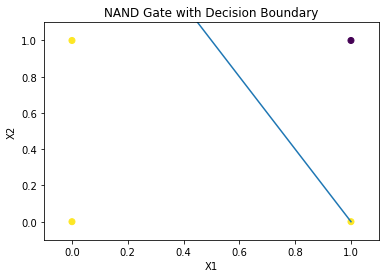

In [ ]:
import matplotlib.pyplot as plt

# TODO: Add your code here

# 1. Draw Four Points
# Hint: use plt.scatter() function




# 2. Draw Decision Boundary
# Hint: 1) use trained w and b in Exercise 1 to calculate [slope] and [intercept] of the decision line
#       2) use plt.plot() to draw the decision line: y = [slope] * x + [intercept]





plt.show()

## Optimisation 1. Unified Weight Vector and Bias Training

Let us now optimise the previous code for training the NAND gate. To train the weight vector $\boldsymbol{w}$ and bias $b$ in a unified code,  we include a bias term as an additional dimension to input $\boldsymbol{x}$. More concretely, we append $1$ to each input:

$$
\boldsymbol{x}'^{(1)} = [0, 0, 1], \quad y^{(1)} = 1 \\
\boldsymbol{x}'^{(2)} = [0, 1, 1], \quad y^{(2)} = 1 \\
\boldsymbol{x}'^{(3)} = [1, 0, 1], \quad y^{(3)} = 1 \\
\boldsymbol{x}'^{(4)} = [1, 1, 1], \quad y^{(4)} = 0 \\
$$

Then, the formula of the single-layer perceptron becomes

$$
\hat{y} = H((w_1, w_2, w_3) \cdot \boldsymbol{x}') = H(w_1 x_1 + w_2 x_2 + w_3)
$$

where $w_1$ and $w_2$ represent weights for $x_1$ and $x_2$, respectively, and $w_3$ is a bias weight.

### Exercise 3

Using the above unified formula, write a piece of code to train the NAND gate for Optimised Version 1.

In [ ]:
import numpy as np

# TODO: Add your code here





print(f'weight      = {w[0], w[1]}')
print(f'bias        = {w[2]}')
print(f'predicted y = {y_pred}')

weight      = (-0.4, -0.2)
bias        = 0.4000000000000001
predicted y = [1. 1. 1. 0.]


## Optimisation 2. Vectorised Mini-batch

It is also desirable to reduce the execution time of the Python interpreter, which is relatively slow. The common technique to speed up a machine-learning code written in Python is to execute computations within the matrix library (e.g. numpy).

The single-layer perceptron makes predictions for four inputs:

$$
\hat{y}^{(1)} = g(\boldsymbol{x}^{(1)} \cdot \boldsymbol{w}) \\
\hat{y}^{(2)} = g(\boldsymbol{x}^{(2)} \cdot \boldsymbol{w}) \\
\hat{y}^{(3)} = g(\boldsymbol{x}^{(3)} \cdot \boldsymbol{w}) \\
\hat{y}^{(4)} = g(\boldsymbol{x}^{(4)} \cdot \boldsymbol{w}) \\
$$

Here, we introduce two matrices

$$
\hat{Y} = \begin{bmatrix}
  \hat{y}^{(1)} \\
  \hat{y}^{(2)} \\
  \hat{y}^{(3)} \\
  \hat{y}^{(4)} \\
\end{bmatrix} \in \mathbb{R}^{4 \times 1}, \quad
X = \begin{bmatrix}
  \boldsymbol{x}^{(1)} \\
  \boldsymbol{x}^{(2)} \\
  \boldsymbol{x}^{(3)} \\
  \boldsymbol{x}^{(4)} \\
\end{bmatrix} \in \mathbb{R}^{4 \times n}
$$

Then, we can write the four predictions in one dot-product computation:

$$
\hat{Y} = X \cdot \boldsymbol{w}
$$


### Exercise 4

Write a piece of code for the Optimised Version 2 to emulate the NAND gate that implements the idea for vectorised mini-batch training.

In [ ]:
import numpy as np

# TODO: Add your code here





print(f'weight       = {w[0], w[1]}')
print(f'bias         = {w[2]}')
print(f'predicted  y = {y_pred}')

weight       = (-0.2, -0.2)
bias         = 0.20000000000000007
predicted  y = [1. 1. 1. 0.]


## Bonus Exercises: Smoother Function Using Gradient Descent

The Heaviside function used by the perceptron is very harsh because a small change in the input can sometimes cause the output to completely flip from 0 to 1. To overcome this problem, we can introduce a new type of smoother function, e.g. a Sigmoid neuron, whose output is much smoother than the Heaviside function.

### Exercise 5

Write a piece of code to define `sigmoid(x)` function and plot it over the interval $x \in [-10, 10]$.

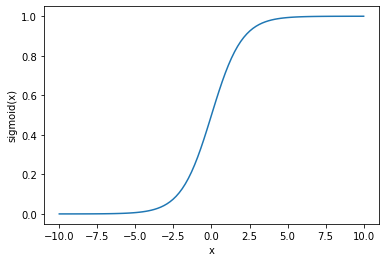

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    # TODO: add your code here to define sigmoid


# TODO: add your code here to plot sigmoid






In the Sigmoid neuron, a small change in the input only causes a small change in the output. Unlike the Heaviside function, whose output is only 0 or 1, the output of Sigmoid neuron is a real value between 0 and 1, which can be interpreted as a probability.

### Exercise 6

Using the Sigmoid function defined in Exercise 5, write a piece of code to emulate the NAND gate through the gradient descent method. Your code can be slightly modified from the previous code in Exercise 4.

In [ ]:
import numpy as np

# TODO: Add your code here





print(f'weight      = {w[0], w[1]}')
print(f'bias        = {w[2]}')
print(f'predicted y = {y_pred}')

weight      = (-5.572713158616354, -5.572713158616354)
bias        = 8.53870165185146
predicted y = [0.99980429 0.95101373 0.95101373 0.06870688]
